In [29]:
import os
import statistics
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np

In [33]:
base_directory = 'best_output/0.01_1_100_100/'  

# CREATE TABLE FITNESS

In [11]:
def get_data_execution(path_base):
    list_best_fitness = []
    list_mean_fitness = []
    
    for i in range(10):
        exec_dir = os.path.join(path_base, f'execution_{i}')
        if os.path.exists(exec_dir):
            fitness_file = os.path.join(exec_dir, 'data_fitness.txt')
            if os.path.exists(fitness_file):
                with open(fitness_file, 'r') as file:
                    linha = file.readline().strip()
                    try:
                        best_fitness, mean_fitness, stdev_fitness = map(float, linha.split())
                        list_best_fitness.append(best_fitness)
                        list_mean_fitness.append(mean_fitness)
                    except ValueError:
                        print(f"Erro ao ler valores no arquivo {fitness_file}. Verifique o formato.")
            else:
                print(f'Arquivo {fitness_file} não encontrado na execução {i}.')
        else:
            print(f'Pasta {exec_dir} não encontrada.')
            
    if list_best_fitness:
        mean_best_fitness = statistics.mean(list_best_fitness)
        stdev_best_fitness = statistics.stdev(list_best_fitness)
    
    if list_mean_fitness:
        mean_all_fitness = statistics.mean(list_mean_fitness)
        stdev_fitness = statistics.stdev(list_mean_fitness)
        
    return mean_best_fitness, stdev_best_fitness, mean_all_fitness, stdev_fitness
        

In [12]:
if __name__ == '__main__':
    prob_mutation_values=[0.01, 0.05, 0.1]
    prob_crossing_values=[0.6, 0.8, 1]
    n_pop_values=[25, 50, 100]
    n_gen_values=[25, 50, 100]
    dataset = {'Taxa de Cruzamento': [], 'Taxa de Mutação': [], 'Tamanho da População': [], 
               'Número de Gerações': [], 'Melhor Aptidão - Média': [], 'Melhor Aptidão - Desvio Padrão': [],
               'Aptidão Média - Média': [], 'Aptidão Média - Desvio Padrão': []}
    for mutation in prob_mutation_values:
        for crossing in prob_crossing_values:
            for n_pop in n_pop_values:
                for n_gen in n_gen_values:
                    path_base = f'output/{mutation}_{crossing}_{n_pop}_{n_gen}'
                    mean_best_fitness, stdev_best_fitness, mean_all_fitness, stdev_fitness = get_data_execution(path_base)
                    dataset['Taxa de Cruzamento'].append(crossing)
                    dataset['Taxa de Mutação'].append(mutation)
                    dataset['Tamanho da População'].append(n_pop)
                    dataset['Número de Gerações'].append(n_gen)
                    dataset['Melhor Aptidão - Média'].append(mean_best_fitness)
                    dataset['Melhor Aptidão - Desvio Padrão'].append(stdev_best_fitness)
                    dataset['Aptidão Média - Média'].append(mean_all_fitness)
                    dataset['Aptidão Média - Desvio Padrão'].append(stdev_fitness)
    

In [23]:
df = pd.DataFrame(dataset)
df.head(5)

,Taxa de Cruzamento,Taxa de Mutação,Tamanho da População,Número de Gerações,Melhor Aptidão - Média,Melhor Aptidão - Desvio Padrão,Aptidão Média - Média,Aptidão Média - Desvio Padrão
0,0.6,0.01,25,25,0.449399,0.478161,0.643237,0.614994
1,0.6,0.01,25,50,0.233933,0.350523,0.403212,0.379649
2,0.6,0.01,25,100,0.339514,0.505110,0.450195,0.551338
3,0.6,0.01,50,25,0.278024,0.419869,0.542946,0.654835
4,0.6,0.01,50,50,0.045087,0.139083,0.077743,0.159288


In [24]:
df_sorted = df.sort_values(by='Melhor Aptidão - Média', ascending=True)
df_sorted.head(5)

,Taxa de Cruzamento,Taxa de Mutação,Tamanho da População,Número de Gerações,Melhor Aptidão - Média,Melhor Aptidão - Desvio Padrão,Aptidão Média - Média,Aptidão Média - Desvio Padrão
26,1.0,0.01,100,100,3.136425e-10,2.441170e-10,0.067724,0.049630
15,0.8,0.01,100,25,6.163737e-08,7.580514e-08,0.087693,0.057268
23,1.0,0.01,50,100,1.594725e-06,5.041171e-06,0.097913,0.127846
25,1.0,0.01,100,50,1.880758e-06,5.943699e-06,0.111486,0.047270
44,0.8,0.05,100,100,4.024728e-02,1.272731e-01,0.485844,0.349255


In [22]:
df_sorted.to_csv('table_fitness.csv')

# CREATE GRAPHICS

In [30]:
def read_data_fitness(directory):
    generations = []
    best_fitness = []
    worst_fitness = []
    mean_fitness = []
    median_fitness = []

    file_path = os.path.join(directory, 'data_generation.txt')

    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            for line in file:
                parts = line.split()
                generation = int(parts[0])  # generation
                best = float(parts[1])  # best fitness
                worst = float(parts[2])  # worst fitness
                mean = float(parts[3])  # mean fitness
                median = float(parts[4])  # median fitness

                generations.append(generation)
                best_fitness.append(best)
                worst_fitness.append(worst)
                mean_fitness.append(mean)
                median_fitness.append(median)
    
    return generations, best_fitness, worst_fitness, mean_fitness, median_fitness



In [31]:
def plot_fitness_evolution(base_dir, num_executions=10):
    plt.figure(figsize=(10, 6))  
    for execution_num in range(num_executions):
        execution_dir = os.path.join(base_dir, f'execution_{execution_num}')
        generations, best_fitness, _, _, _ = read_data_fitness(execution_dir)
        plt.plot(generations, best_fitness, label=f'Execution {execution_num}')

    plt.title('Evolução do Melhor Fitness por Geração')
    plt.xlabel('Geração')
    plt.ylabel('Melhor Fitness')
    plt.legend()
    plt.show()

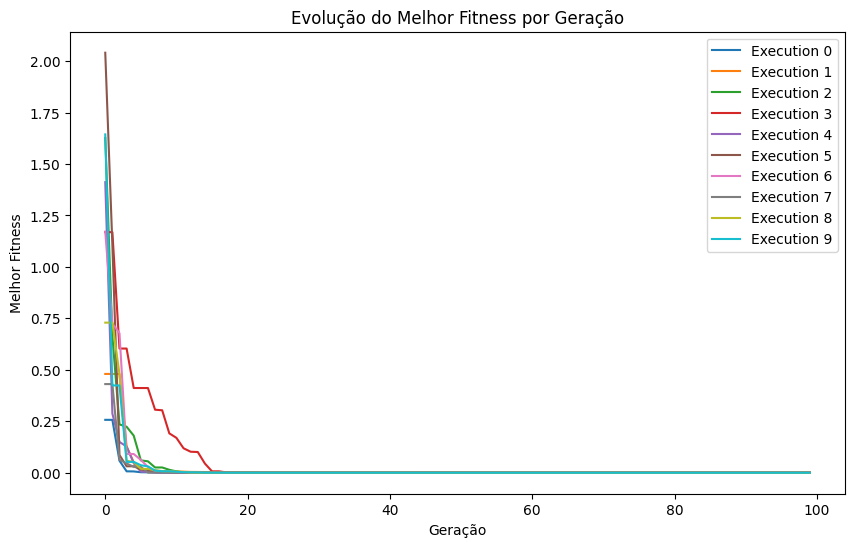

In [ ]:
plot_fitness_evolution(base_directory, num_executions=10)

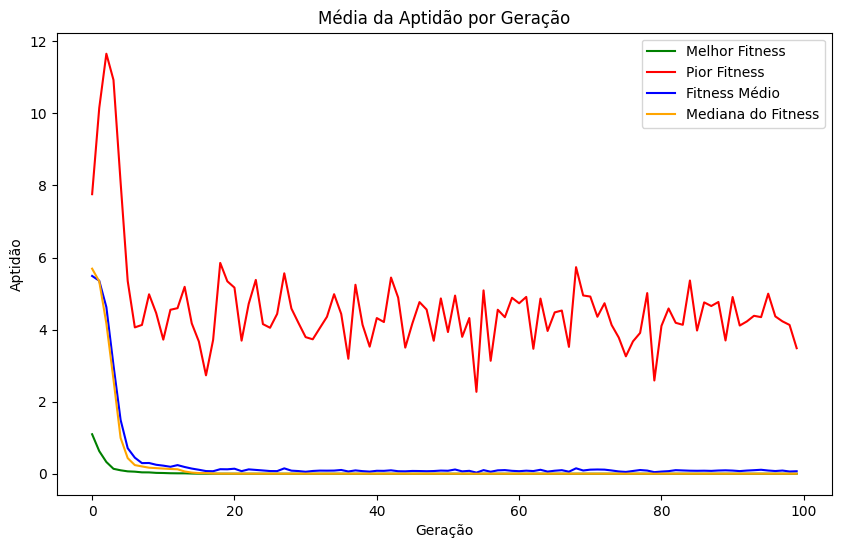

In [35]:
def calculate_values_by_generation(base_dir, num_executions=10):
    all_best_fitness = []
    all_worst_fitness = []
    all_mean_fitness = []
    all_median_fitness = []

    for execution_num in range(num_executions):
        execution_dir = os.path.join(base_dir, f'execution_{execution_num}')
        generations, best, worst, mean, median = read_data_fitness(execution_dir)
        all_best_fitness.append(best)
        all_worst_fitness.append(worst)
        all_mean_fitness.append(mean)
        all_median_fitness.append(median)

    avg_best_fitness = np.mean(all_best_fitness, axis=0)
    avg_worst_fitness = np.mean(all_worst_fitness, axis=0)
    avg_mean_fitness = np.mean(all_mean_fitness, axis=0)
    avg_median_fitness = np.mean(all_median_fitness, axis=0)

    return generations, avg_best_fitness, avg_worst_fitness, avg_mean_fitness, avg_median_fitness

def plot_fitness_averages(base_dir, num_executions=10):
    generations, avg_best_fitness, avg_worst_fitness, avg_mean_fitness, avg_median_fitness = calculate_values_by_generation(base_dir, num_executions)

    plt.figure(figsize=(10, 6))  
    plt.plot(generations, avg_best_fitness, label='Melhor Fitness', color='g')
    plt.plot(generations, avg_worst_fitness, label='Pior Fitness', color='r')
    plt.plot(generations, avg_mean_fitness, label='Fitness Médio', color='b')
    plt.plot(generations, avg_median_fitness, label='Mediana do Fitness', color='orange')

    plt.title('Média da Aptidão por Geração')
    plt.xlabel('Geração')
    plt.ylabel('Aptidão')
    plt.legend()
    plt.show()

plot_fitness_averages(base_directory, num_executions=10)
